In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

data_dir = 'data'

In [4]:
df = pd.read_csv(os.path.join(data_dir, 'final_data.csv'))

df.head()

,TAU_bl,PTAU_bl,ABETA_bl,PTEDUCAT,MMSE_bl,EcogPtTotal_bl,LDELTOTAL_BL,mPACCdigit_bl,mPACCtrailsB_bl,RAVLT_immediate_bl,...,SUVr_Vermis_1_2.nii,SUVr_Vermis_3.nii,SUVr_Vermis_4_5.nii,SUVr_Vermis_6.nii,SUVr_Vermis_7.nii,SUVr_Vermis_8.nii,SUVr_Vermis_9.nii,SUVr_Vermis_10.nii,SUVr_VTA_L.nii,SUVr_VTA_R.nii
0,101.2,10.08,731.8,-1.0,-2.0,-0.179246,15.0,1.722587,1.525525,0.440843,...,0.003369,0.011351,0.030880,0.018253,0.009289,0.011917,0.008881,0.006231,0.000712,0.000659
1,324.8,34.39,780.3,-2.0,-3.0,0.216812,7.0,0.221907,0.032151,0.582690,...,0.003325,0.011246,0.029007,0.016903,0.009108,0.012666,0.008033,0.006029,0.000770,0.000699
2,490.4,53.18,832.7,0.5,0.5,-0.275793,3.0,-1.111149,-1.035326,-0.784427,...,0.003402,0.011694,0.033622,0.019224,0.010413,0.012902,0.007799,0.005730,0.000804,0.000760
3,108.2,10.55,590.4,3.0,3.0,-0.545607,11.0,0.306061,0.339234,0.002003,...,0.003367,0.011986,0.034076,0.019834,0.010011,0.012782,0.009789,0.006613,0.000748,0.000675
4,247.1,24.78,466.1,1.0,0.5,0.040211,18.0,1.883734,1.336483,0.512023,...,0.002935,0.009448,0.028740,0.017897,0.009361,0.012595,0.008533,0.005170,0.000675,0.000675


# Predict ABETA baseline 

Features are cog scores and pet suvr's
Drop the other CSF from the features
Target is ABETA_bl


### Data set-up


In [10]:
X = df.drop(columns = ['ABETA_bl', 'TAU_bl', 'PTAU_bl'])
y = df['ABETA_bl']

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=41)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(434, 175) (109, 175) (434,) (109,)


In [44]:
print(np.random.randint(0, 1000, size=X.shape[1]))

[908 591 343   5 691 670 756 266 590 456 153 663  94 153 248 936 188 455
 997 875 907 257 935 749 605 174 652 141   6 123 573 338 924 110 222 790
 442  45 627 780 926 960 237 298 276 764 836 307 775   9 866 738 497 993
 758 561 443 393 484 526 889 474 420 881 749 903 946 885 920 584 979 129
 961 855 465 254 783 489 380 619 955   8 584 565  12 413 746 278 531 783
 335 259 371 932 906 582  38  67 347 964 136 736 338 181 273 175 281 732
 938 783 862 878 262 765 574 735 651 112 390 365 999 141  33  25 395 318
 280 559 198 764 261 949 856 568 752 257  96 954 810 316 212 849 817 439
 851 729 388 474 216 304  24 920 603 183 565 820 492 128 822 200 388 930
 364 441 323 173 746 567  62 274 187  17 255 448 734]


### Model set up

In [45]:
kernel = 1 * RBF(length_scale= np.random.randint(0, 1000, size=X.shape[1]), 
                 length_scale_bounds = (1e-2, 1e3))

gpr = GaussianProcessRegressor(kernel=kernel,
                               alpha = 5e-1,
                               n_restarts_optimizer= 10,
                               random_state=42,
                               normalize_y= True)

gpr.fit(X_train, y_train)

c:\Users\huw\OneDrive\Documents\Research_Internship\MPhys_scripts\.conda\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\huw\OneDrive\Documents\Research_Internship\MPhys_scripts\.conda\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\huw\OneDrive\Documents\Research_Internship\MPhys_scripts\.conda\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 3 of parameter k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and c

,kernel,"1**2 * RBF(le...65, 853, 348])"
,alpha,0.5
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,10
,normalize_y,True
,copy_X_train,True
,n_targets,None
,random_state,42
,kernel__k1,1**2
,kernel__k2,"RBF(length_sc...65, 853, 348])"
,kernel__k1__constant_value,1


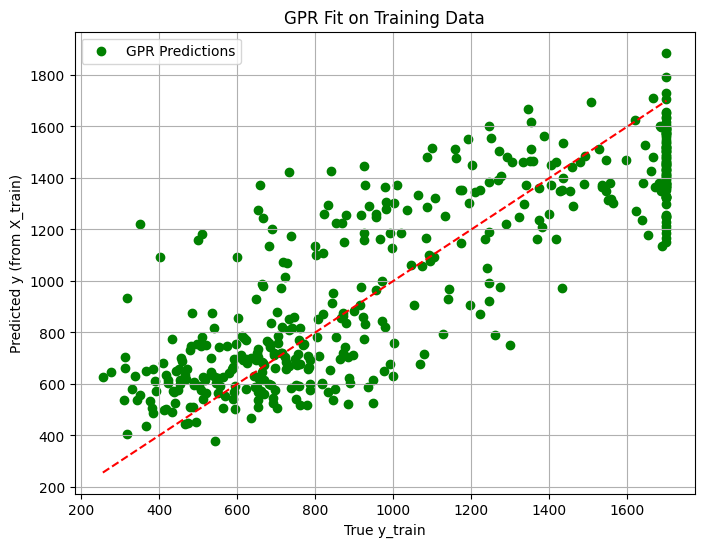

MSE: 60629.50571041249
Rsquared: 0.7110540171568838


In [49]:
y_mean_train, y_std_train = gpr.predict(X_train, return_std= True)


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_mean_train, color='green', label='GPR Predictions')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--') 
plt.xlabel("True y_train")
plt.ylabel("Predicted y (from X_train)")
plt.title("GPR Fit on Training Data")
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_train, y_mean_train)
r2 = r2_score(y_train, y_mean_train)

print(f"MSE: {mse}")
print(f"Rsquared: {r2}")

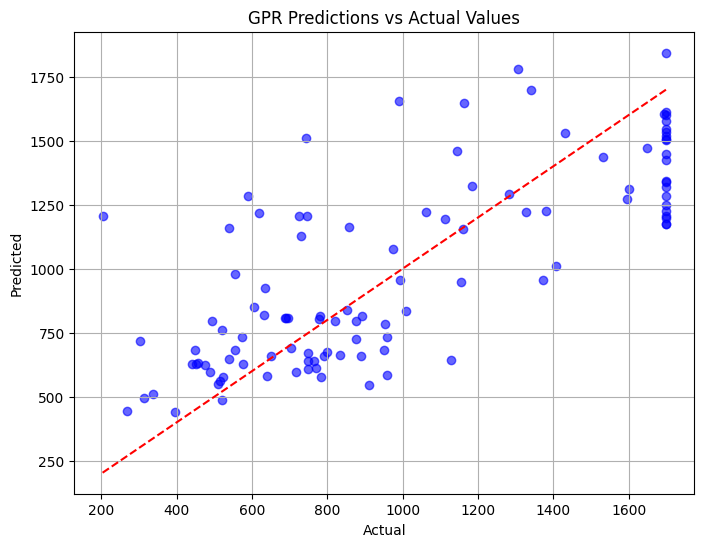

MSE: 90150.34751664466
Rsquared: 0.5746527976919857


In [50]:
y_mean_test, y_std_train = gpr.predict(X_test, return_std= True)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_mean_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("GPR Predictions vs Actual Values")
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_mean_test)
r2 = r2_score(y_test, y_mean_test)

print(f"MSE: {mse}")
print(f"Rsquared: {r2}")